In [40]:
import pandas as pd

# Load dataset
filename = "IFND.csv"

# Use 'errors' parameter to handle invalid byte sequences
with open(filename, 'r', encoding='utf-8', errors='replace') as file:
    data = pd.read_csv(file)

# Custom function to convert dates and handle errors
def convert_date(date_str, date_format):
    try:
        return pd.to_datetime(date_str, format=date_format)
    except ValueError:
        return None #pd.Timestamp('1900-01-01')

# Convert 'Date' column to datetime
data['Date'] = data['Date'].apply(lambda x: convert_date(x, "%b-%y"))


# Preprocess text data (e.g., tokenization, lowercasing, etc.)
# ... Add preprocessing steps here


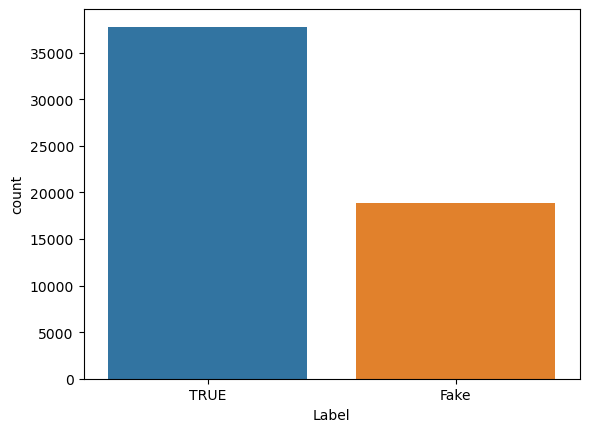

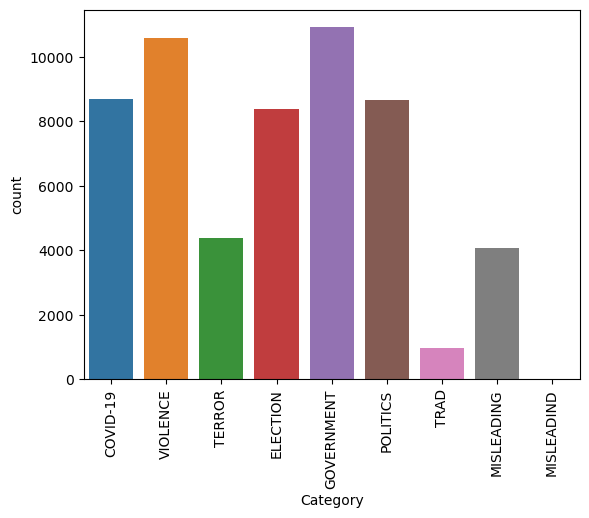

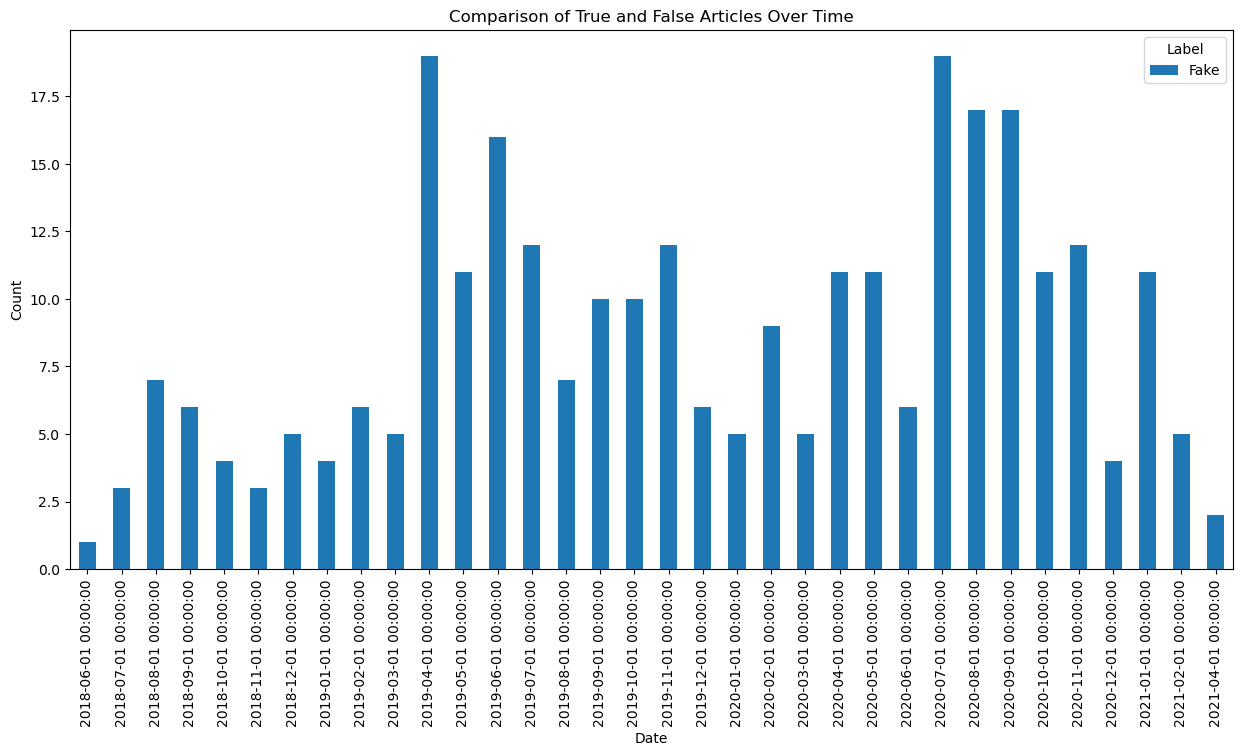

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of real and fake news
sns.countplot(data=data, x='Label')
plt.show()

# Plot the distribution of news categories
sns.countplot(data=data, x='Category')
plt.xticks(rotation=90)
plt.show()

# Filter the data to keep only rows with 'Label' equal to 'Fake'
fake_data = data[data['Label'] == 'Fake']
# Group by date and label, and count the number of articles
articles_per_month = fake_data.groupby(['Date', 'Label']).size().reset_index(name='Count')

# Create a pivot table with YearMonth as index, Label as columns, and Count as values
pivot_table = articles_per_month.pivot_table(index='Date', columns='Label', values='Count', fill_value=0)

# Plot the bar chart comparing true and false articles for each date
pivot_table.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Comparison of True and False Articles Over Time')
plt.show()

